In [1]:
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import torch
import time
#import evaluate
import pandas as pd
import numpy as np

In [3]:
huggingface_dataset_name = "SebastiantorresVFX/Comic_Book_Reg_Images_SDXL"
dataset = load_dataset(huggingface_dataset_name)
dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 1555
    })
})

In [19]:
dataset['train'][0]#.features#['image']

RuntimeError: File '00892-3563620911.png' is encrypted, password required for extraction

# New text2image

In [2]:
pip install langchain diffusers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: requests-toolbelt
    Found existing installation: requests-toolbelt 0.10.1
    Uninstalling requests-toolbelt-0.10.1:
      Successfully uninstalled requests-toolbelt-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model_name = "Qwen/Qwen2.5-1.5B-Instruct"
model = AutoModelForCausalLM.from_pretrained(model_name,torch_dtype="auto",device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

In [4]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker = None)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://gi

In [5]:
one = '''
You will be given a paragraph from a novel. Identify the dominant elements to create a concise, visually descriptive prompt.

Steps:  
1. Focus on the Major Elements: Identify one dominant character, one significant action, and one key setting. Ignore minor details and secondary elements.  
2. Generalize Descriptions: Avoid specific names, and instead describe characters as 'a person,' 'a man,' 'a woman,' or other generic terms.  
3. Write a Visual Prompt: Combine the dominant character, action, and setting into a single, concise sentence suitable for a text-to-image model.  

Examples:
'''

q1 = '''Paragraph:  
"Baba hired the same nursing woman who had fed me to nurse Hassan. Ali told us she was a blue-eyed Hazara woman from Bamiyan, the city of the giant Buddha statues. 'What a sweet singing voice she had,' he used to say to us."'''

a1 = '''Output:  
"A person hiring a nursing woman with blue eyes."'''

q2 = '''Paragraph:  
"As confided to a neighbor's servant by the garrulous midwife, who had then in turn told anyone who would listen, Sanaubar had taken one glance at the baby in Ali's arms, seen the cleft lip, and barked a bitter laughter."'''

a2 = '''Output:  
"A woman laughing bitterly at a baby."'''

q3 = '''Paragraph:  
"Lore has it my father once wrestled a black bear in Baluchistan with his bare hands. If the story had been about anyone else, it would have been dismissed as laaf, that Afghan tendency to exaggerate. But no one ever doubted the veracity of any story about Baba. And if they did, well, Baba did have those three parallel scars coursing a jagged path down his back. I have imagined Baba's wrestling match countless times, even dreamed about it. And in those dreams, I can never tell Baba from the bear."'''

a3 = '''Output:  
"A person wrestling a black bear with scars on his back."'''

q4 = '''Paragraph:  
"It was Rahim Khan who first referred to him as what eventually became Baba's famous nickname, Toophan agha, or 'Mr. Hurricane.' At parties, when all six-foot-five of him thundered into the room, attention shifted to him like sunflowers turning to the sun."'''

a4 = '''Output:  
"A tall man commanding attention as he enters a party."'''

q5 = '''Paragraph:  
"{paragraph}"'''


In [10]:
from langchain.prompts import ChatPromptTemplate


def prompt_templates(paragraph):    
    prompt_template = ChatPromptTemplate.from_template(q5)
    messages = prompt_template.format_messages(paragraph=paragraph)
    prompt = messages[0].content
    return prompt




def generate_response(prompt):

    
    messages = [
        {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
        {"role": "user", "content": one},
        {"role": "assistant", "content": "Sure! Please provide the paragraph."},
        
        {"role": "user", "content": q1},
        {"role": "assistant", "content": a1},
        
        {"role": "user", "content": q2},
        {"role": "assistant", "content": a2},
        
        {"role": "user", "content": q3},
        {"role": "assistant", "content": a3},
        
        {"role": "user", "content": q4},
        {"role": "assistant", "content": a4},

        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
    generated_ids = model.generate(**model_inputs,max_new_tokens=512)
    generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)]
    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return response



prompt = prompt_templates("""I watched him fill his glass at the bar and wondered how much time would pass before we talked again the way we just had. Because the truth of it was, I always felt like Baba hated me a little. And why not? After all, I had killed his beloved wife, his beautiful princess, hadn't I? The least I could have done was to have had the decency to have turned out a little more like him. But I hadn't turned out like him. Not at all.""")
res = generate_response(prompt)
print(res)


Output:  
"A person watching another drink at a bar."


In [23]:

prompt1 = "A dimly lit room with three old schoolmates engaged in a serious discussion, ignoring a fourth person who looks dejected and poorly dressed. The atmosphere conveys feelings of contempt and isolation."
prompt2 = "An emotional scene depicting a neglected figure seated alone in a corner while three former classmates converse nearby, their expressions showing surprise and disdain. The setting hints at nostalgia and past rivalries."
prompt3 = "A split scene showing contrasting emotions: one side with three friends deep in conversation, and the other with a lonely, disheartened individual, dressed shabbily, feeling out of place."
prompta = "An artistic illustration in the style of Ivan Kramskoy, depicting a young boy in a dimly lit room, discovering an old history book with dust on it, showing a chapter about the Hazara people, with illustrations of their distinct features and cultural elements."
promptc = "A classic painting reminiscent of Ivan Kramskoy, portraying the boy's shocked expression as he learns about the violent history between the Pashtuns and Hazaras, with visual elements symbolizing their cultural differences, such as traditional clothing and religious symbols."



In [11]:
p = res.split('Output:')[1].strip().replace('"', '')

prompt = f"A dimly lit scene, illustration, artwork, depicting {p.lower()}"
#prompt = 'A man'
image = pipe(prompt=prompt, height=504, width=504, num_inference_steps=50).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

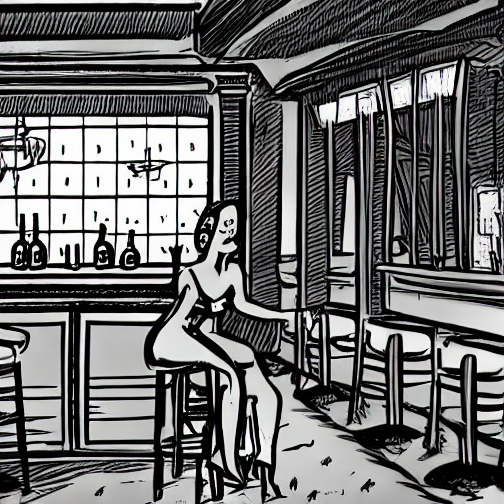

In [12]:
image

In [58]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16
)

pipe2 = StableDiffusionControlNetPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    controlnet=controlnet,
    torch_dtype=torch.float16
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

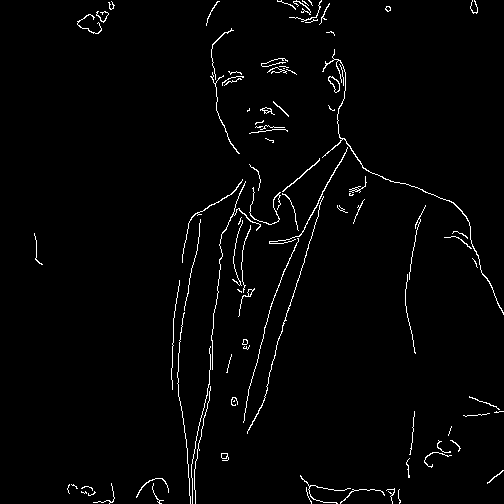

In [66]:
import cv2
import numpy as np
from PIL import Image
# Convert to grayscale and apply Canny edge detection
image_np = np.array(image)
edges = cv2.Canny(image_np, 180, 340)  # Adjust thresholds as needed
edges_image = Image.fromarray(edges)
edges_image#.show()  # Visualize the edges

In [67]:
# Use the edges image as the conditioning input
prompt = "A futuristic cityscape at night, highly detailed, sci-fi"

generated_image = pipe2(
    prompt=prompt,
    image=edges_image,  # The preprocessed reference image
    num_inference_steps=50,
    guidance_scale=7.5,  # Strength of adherence to the prompt
    controlnet_conditioning_scale=1.0  # Strength of adherence to the reference
).images[0]



  0%|          | 0/50 [00:00<?, ?it/s]

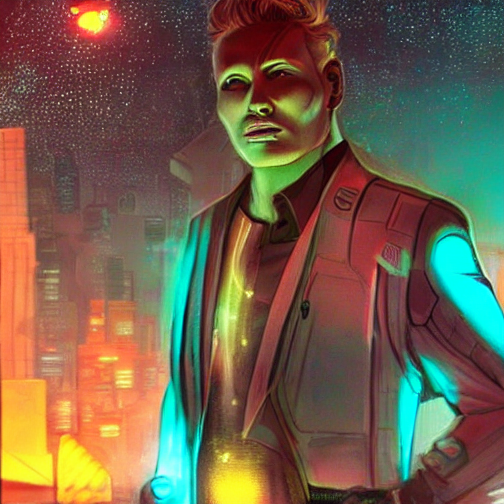

In [68]:
generated_image

In [65]:
#dtype = torch.float16 if torch.cuda.is_available() else torch.float32

#latents = torch.randn(
#    (1, pipe.unet.in_channels, 504 // 8, 504 // 8),  # Batch size, channels, height//8, width//8
#    generator=torch.manual_seed(42),
#    dtype=dtype)
new_latents = torch.randn_like(latents)  # Generate a new random latent
modified_latents = 0.2 * latents + 0.8 * new_latents


In [66]:
seed = 42  
generator = torch.manual_seed(seed)



image = pipe(prompt='''man in a car''',
             height=504, width=504, num_inference_steps=50,latents=modified_latents,).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

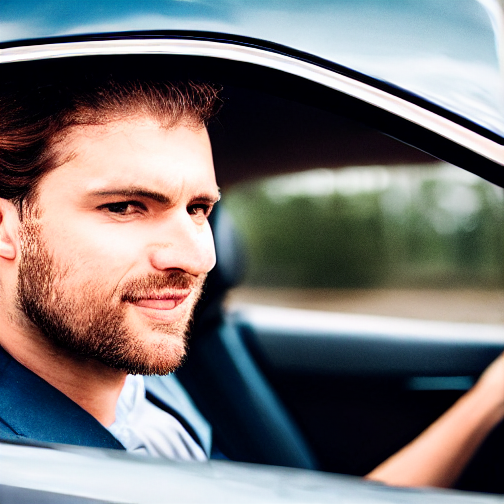

In [57]:
image

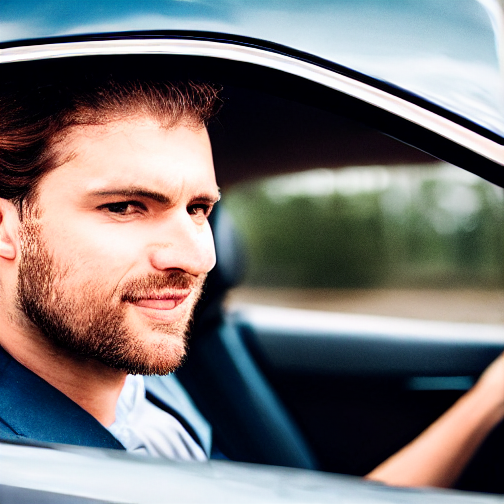

In [67]:
image

In [9]:
#huggingface_dataset_name = "kmfoda/booksum"
#dataset = load_dataset(huggingface_dataset_name)
dataset

DatasetDict({
    train: Dataset({
        features: ['bid', 'is_aggregate', 'source', 'chapter_path', 'summary_path', 'book_id', 'summary_id', 'content', 'summary', 'chapter', 'chapter_length', 'summary_name', 'summary_url', 'summary_text', 'summary_analysis', 'summary_length', 'analysis_length'],
        num_rows: 9600
    })
    validation: Dataset({
        features: ['bid', 'is_aggregate', 'source', 'chapter_path', 'summary_path', 'book_id', 'summary_id', 'content', 'summary', 'chapter', 'chapter_length', 'summary_name', 'summary_url', 'summary_text', 'summary_analysis', 'summary_length', 'analysis_length'],
        num_rows: 1484
    })
    test: Dataset({
        features: ['bid', 'is_aggregate', 'source', 'chapter_path', 'summary_path', 'book_id', 'summary_id', 'content', 'summary', 'chapter', 'chapter_length', 'summary_name', 'summary_url', 'summary_text', 'summary_analysis', 'summary_length', 'analysis_length'],
        num_rows: 1431
    })
})

In [18]:
len(dataset['train'])

9600

In [19]:
from tqdm.notebook import tqdm
l=[]
for i in tqdm(range(len(dataset['train']))):
    l.append(len(dataset['train'][i]['chapter'].split()))

  0%|          | 0/9600 [00:00<?, ?it/s]

In [47]:
model_name='google/long-t5-local-base'

original_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

Some weights of LongT5ForConditionalGeneration were not initialized from the model checkpoint at google/long-t5-local-base and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [43]:
import pandas as pd
lengths = pd.Series(l)
lengths = 0

In [ ]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

print(print_number_of_trainable_model_parameters(original_model))

# ---------------------------------------------------

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen2.5-1.5B-Instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name)



In [1]:
few_shot_prompt_sentences = """
You will be given a word, and your task is to create a sentence that makes the meaning of the word clear from its context. The sentence should not define the word directly but should provide enough clues so that the reader understands what the word means.

### Examples

Word: "benevolent"
Sentence: The benevolent king gave half of his fortune to help the poor and build schools for the underprivileged.

Word: "perplexed"
Sentence: Sarah was perplexed by the confusing instructions, not knowing whether to turn left or right.

Word: "melancholy"
Sentence: After the loss of his friend, John felt a deep sense of melancholy, a sadness that he couldn’t shake off.

Word: "frugal"
Sentence: Even though he earned a decent salary, Jack was frugal, always buying the cheapest items and saving the rest of his money for a rainy day.

Word: "resilient"
Sentence: Despite all the challenges she faced, Maria remained resilient, bouncing back stronger after every setback.

Word: "garrulous"
Sentence: 
"""

few_shot_prompt_sentences_child_friendly = """
You will be given a word, and your task is to create a sentence that makes the meaning of the word clear from its context. The sentence should not define the word directly but should provide enough clues so that even a child can understand what the word means. Use simple language and examples.

### Examples

Word: "benevolent"
Sentence: The benevolent teacher gave her students extra time to finish their homework and even brought snacks for everyone.

Word: "perplexed"
Sentence: Emma was perplexed when she looked at the puzzle because she couldn’t figure out where the pieces should go.

Word: "melancholy"
Sentence: After her pet fish died, Sarah sat in her room feeling very melancholy, staring at the empty fishbowl.

Word: "frugal"
Sentence: Even though Tom had money to buy a new toy, he decided to be frugal and save it for something more important later.

Word: "resilient"
Sentence: Even though Jamie fell off his bike and scraped his knee, he was resilient and got right back on to try again.

Word: {word}
Sentence: 
"""

few_shot_prompt_meanings = """
You will be given a word, and your task is to explain its meaning in a way that a child can understand. Use simple language, examples, or comparisons to make the meaning clear. The explanation should be short and easy to grasp.

### Examples

Word: "benevolent"
Meaning: Being kind and helping others, like when someone gives their toys to a friend who doesn’t have any.

Word: "perplexed"
Meaning: Feeling confused, like when you don’t understand how to finish a puzzle.

Word: "melancholy"
Meaning: Feeling very sad for a long time, like missing your favorite pet when it’s gone.

Word: "frugal"
Meaning: Being careful with money, like saving your allowance instead of spending it all at once.

Word: "resilient"
Meaning: Being strong and able to keep going, like when you fall down but get back up to try again.

Word: {word}
Meaning: 
"""

few_shot_contextualized_meanings = """
You will be given a word and a paragraph in which the word is used. Your task is to explain the meaning of the word specifically in the context of the paragraph. Focus on how the word is being used and what it means in that particular situation, not its general or dictionary definition.

### Examples

Word: "perplexed"
Paragraph: Sarah was perplexed by the confusing instructions, not knowing whether to turn left or right. She stood there for several minutes, trying to figure out what the signs meant.
Contextualized Meaning: In this paragraph, "perplexed" means that Sarah was very confused and unsure of what to do because the instructions were hard to understand.

Word: "melancholy"
Paragraph: The rainy afternoon filled the room with a gloomy atmosphere, and John sat quietly by the window, lost in thoughts of his old friend. The melancholy feeling lingered as he watched the raindrops fall.
Contextualized Meaning: In this context, "melancholy" refers to a deep, quiet sadness that John feels as he thinks about his old friend, intensified by the rainy, gloomy weather.

Word: "frugal"
Paragraph: Although Henry could afford to buy expensive clothes, he chose to live frugally, always looking for sales and wearing his clothes until they were worn out.
Contextualized Meaning: Here, "frugal" means that Henry chooses to spend his money carefully and avoid buying things he doesn’t need, even though he has enough money.

Word: "garrulous"
Paragraph: As confided to a neighbor's servant by the garrulous midwife, who had then in turn told anyone who would listen, Sanaubar had taken one glance at the baby in Ali's arms, seen the cleft lip, and barked a bitter laughter.
Contextualized Meaning: 
"""

few_shot_child_friendly_contextualized_meanings = """
You will be given a word and a paragraph in which the word is used. Your task is to explain the meaning of the word specifically in the context of the paragraph, but in a way that would be easy for a child to understand. Focus on how the word is being used in that particular situation and use simple language, examples, or comparisons to make it clear.

### Examples

Word: "perplexed"
Paragraph: Sarah was perplexed by the confusing instructions, not knowing whether to turn left or right. She stood there for several minutes, trying to figure out what the signs meant.
Contextualized Meaning: In this paragraph, "perplexed" means Sarah was really confused because she didn’t understand which way to go. It’s like when you don’t know how to finish a game and you’re not sure what to do next.

Word: "melancholy"
Paragraph: The rainy afternoon filled the room with a gloomy atmosphere, and John sat quietly by the window, lost in thoughts of his old friend. The melancholy feeling lingered as he watched the raindrops fall.
Contextualized Meaning: Here, "melancholy" means John feels very sad and quiet, like when you miss someone you care about, and it’s even harder because the weather is dark and rainy.

Word: "frugal"
Paragraph: Although Henry could afford to buy expensive clothes, he chose to live frugally, always looking for sales and wearing his clothes until they were worn out.
Contextualized Meaning: In this paragraph, "frugal" means Henry is careful with his money and doesn’t spend it on new clothes unless he really needs to, even though he has enough money. It’s like saving your allowance instead of buying new toys right away.

Word: {word}
Paragraph: {paragraph}
Contextualized Meaning: 
"""

In [10]:
prompts=[few_shot_prompt_meanings,
         few_shot_prompt_sentences_child_friendly,
        few_shot_child_friendly_contextualized_meanings]




In [6]:
pip install langchain

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: requests-toolbelt
    Found existing installation: requests-toolbelt 0.10.1
    Uninstalling requests-toolbelt-0.10.1:
      Successfully uninstalled requests-toolbelt-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cudf 24.8.2 

In [7]:
from langchain.prompts import ChatPromptTemplate

def prompt_templates(word, paragraph):
    final_prompts=[]
    
    for prompt in prompts:
        prompt_template = ChatPromptTemplate.from_template(prompt)
        try:
            messages = prompt_template.format_messages(word=word)
        except:
            messages = prompt_template.format_messages(word=word, paragraph = paragraph)

        prompt = messages[0].content
        final_prompts.append(prompt)
    
    return final_prompts


In [8]:

def generate_response(prompt):
    messages = [
        {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=512
    )
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return response

In [8]:
word="imbecile"
paragraph = '''My favorite part of reading to Hassan was when we came across a big word that he didn't know. I'd tease him, expose his ignorance. One time, I was reading him a Mullah Nasruddin story and he stopped me. "What does that word mean?"
"Which one?"
"Imbecile."
"You don't know what it means?" I said, grinning.
"Nay, Amir agha."'''

final_prompts = prompt_templates(word, paragraph)

In [9]:
l=[f'Meaning of the word ', f'Putting in another sentence the word ', f'Contextual meaning of the word ']

for i in range(len(final_prompts)):
    response = generate_response(final_prompts[i])
    print(f'{l[i]}{word}:\n{response}\n\n\n\n')
    

Meaning of the word imbecile:
Aimless. It means someone who does not know where they want to go or what they want to do.




Putting in another sentence the word imbecile:
The imbecile tried to argue with the wise old man, but no matter how many times he said silly things, the man just shook his head and walked away without listening.




Contextual meaning of the word imbecile:
In this paragraph, "imbecile" means Hassan is silly or stupid. It's like if you saw a toy car that couldn't move at all - you might say it's an "imbecile" toy car because it can't work properly.






In [177]:
character_extraction_prompt = """
You will be given a paragraph, and your task is to identify and list all the characters mentioned in it. A character can be a person, an animal, or any entity that plays a role in the narrative. Return the names of the characters in a comma-separated list. If no characters are mentioned, return "None."

### Examples

Paragraph: "Sarah and Tom went to the park, where they met Anna and her dog, Max. They played together until sunset."
Characters: "Sarah, Tom, Anna, Max"

Paragraph: "The ancient tree stood tall, watching over the village as the seasons changed."
Characters: None

Paragraph: "As the storm raged outside, John and his sister, Lily, huddled together, listening to their father's stories."
Characters: "John, Lily, father"

Paragraph: "The brave knight fought the dragon, while the villagers watched from a distance."
Characters: "knight, dragon, villagers"

Paragraph: "I did not want them to, but the two of them did all the cooking, all the cleaning. Hassan tended to the flowers in the garden, soaked the roots, picked off yellowing leaves, and planted rosebushes. He painted the walls. In the house, he swept rooms no one had slept in for years, and cleaned bathrooms no one had bathed in. Like he was preparing the house for someone's return. Do you remember the wall behind the row of corn your father had planted, Amir jan? What did you and Hassan call it, "the Wall of Ailing Corn"? A rocket destroyed a whole section of that wall in the middle of the night early that fall. Hassan rebuilt the wall with his own hands, brick by brick, until it stood' whole again. I do not know what I would have done if he had not been there. Then late that fall, Farzana gave birth to a stillborn baby girl. Hassan kissed the baby's lifeless face, and we buried her in the backyard, near the sweetbrier bushes. We covered the little mound with leaves from the poplar trees. I said a prayer for her. Farzana stayed in the hut all day and wailed--it is a heartbreaking sound, Amir jan, the wailing of a mother. I pray to Allah you never hear it."
Characters: 
"""

generate_response(character_extraction_prompt)

'Hassan, Amir, Farzana, Poplar Trees, Sweetbrier Bushes'

# ---------------------------------------------------

In [9]:
def generate_response(prompt):
    messages = [
        {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=500, temperature=0.1
    )
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return response

In [42]:
print(generate_response(f"Hello what is the capital of america"))

The capital of America (United States) is Washington D.C..


In [10]:
messages = [
        {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
        {"role": "user", "content": 'sdfsfr'}]
text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )
text

'<|im_start|>system\nYou are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>\n<|im_start|>user\nsdfsfr<|im_end|>\n<|im_start|>assistant\n'

In [ ]:
dataset['validation'][0]['chapter'][:12000]

# ------------------

### LangGraph

In [11]:
print(generate_response('Hello world'))


Hello! How can I help you today?


In [12]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen2.5-1.5B-Instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [13]:
class Agent:
    def __init__(self, system=""):
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})
            
    def __call__(self, message):
        self.messages.append ({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result
        
    def execute(self):
        text = tokenizer.apply_chat_template(
        self.messages,
        tokenize=False,
        add_generation_prompt=True)  
        
        model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

        generated_ids = model.generate(**model_inputs,max_new_tokens=500, temperature=0.1)
        generated_ids = [
            output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
        ]
        response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
        
        return response

In [14]:
prompt ='''You run in a lopp of Thought, Action, PAUSE, Observation.
At the end of the loop you output an Answer
Use Thought to describe your thoughts about the question you have been asked.
Use Action to run one of the actions available to you - then return PAUSE

Observation will be the result of running those actions.

Your available actions are:
calculate:
e.g. calculate: 4 * 7 / 3
Runs a calculation and returns the number - uses Python so be sure to format calculations correctly to avoid syntax errors.  

average_dog_weight:
e.g. average_dog_weight: Collie
returns average weight of a dog when given the breed

Example session:

Question: How much does a Bulldog weigh?
Thought: I should look the dogs weight using average_dog_weight
Action: average_dog_weight: Bulldog
PAUSE
You will be called again with this:
Observation: A Bulldog weights 51 lbs
You then output:
Answer: A bulldog weights 51 lbs'''.strip()

In [20]:
def calculate(what):
    return eval(what)
    
def average_dog_weight (name):
    
    if name in "Scottish Terrier":
        return ("Scottish Terriers average 20 lbs")
        
    elif name in "Border Collie":
        return("a Border Collies average weight is 37 lbs")
        
    elif name in "Toy Poodle":
        return("a toy poodles average weight is 7 lbs")
        
    else:
        return("An average dog weights 50 lbs")

known_actions = {"calculate": calculate,
                 "average_dog_weight": average_dog_weight}

In [16]:
bot = Agent(prompt)
print(bot('How much does a toy poodle weigh?'))


Thought: To find out how much a toy poodle weighs, I need to use the 'average_dog_weight' function with the breed as 'toy poodle'.
Action: average_dog_weight: Toy Poodle
PAUSE


In [21]:
next_prompt = f"Observation: {average_dog_weight('Toy Poodle')}"


In [23]:
print(bot(next_prompt))

Answer: The average weight of a toy poodle is 7 lbs.


In [24]:
bot.messages

[{'role': 'system',
  'content': 'You run in a lopp of Thought, Action, PAUSE, Observation.\nAt the end of the loop you output an Answer\nUse Thought to describe your thoughts about the question you have been asked.\nUse Action to run one of the actions available to you - then return PAUSE\n\nObservation will be the result of running those actions.\n\nYour available actions are:\ncalculate:\ne.g. calculate: 4 * 7 / 3\nRuns a calculation and returns the number - uses Python so be sure to format calculations correctly to avoid syntax errors.  \n\naverage_dog_weight:\ne.g. average_dog_weight: Collie\nreturns average weight of a dog when given the breed\n\nExample session:\n\nQuestion: How much does a Bulldog weigh?\nThought: I should look the dogs weight using average_dog_weight\nAction: average_dog_weight: Bulldog\nPAUSE\nYou will be called again with this:\nObservation: A Bulldog weights 51 lbs\nYou then output:\nAnswer: A bulldog weights 51 lbs'},
 {'role': 'user', 'content': 'How much

In [31]:
question = """I have 2 dogs, a border collie and a scottish terrier. What is their combined weight"""
res = bot(question)
print(res)

Thought: To find the combined weight of the two dogs, I need to add their individual weights together. Let's assume the average weight for a Border Collie is around 30 pounds and for a Scottish Terrier it is around 15 pounds.
Action: average_dog_weight: Border Collie
Action: average_dog_weight: Scottish Terrier
Action: sum: (average_dog_weight: Border Collie + average_dog_weight: Scottish Terrier)
PAUSE


In [32]:
res.split('Action:') 

["Thought: To find the combined weight of the two dogs, I need to add their individual weights together. Let's assume the average weight for a Border Collie is around 30 pounds and for a Scottish Terrier it is around 15 pounds.\n",
 ' average_dog_weight: Border Collie\n',
 ' average_dog_weight: Scottish Terrier\n',
 ' sum: (average_dog_weight: Border Collie + average_dog_weight: Scottish Terrier)\nPAUSE']

# Objects imagery

In [4]:
pip install diffusers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker = None)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://gi

In [99]:
prompt = '''hacker stock photo'''



generator = torch.Generator(device=device).manual_seed(20)
image = pipe(prompt,
             num_images_per_prompt=4,
             #negative_prompt = 'Cartoon, art, painting, vintage, old, black and white',
             height=560, width=560,
             num_inference_steps=30,
             #guidance_scale = 5,
             generator=generator)

  0%|          | 0/30 [00:00<?, ?it/s]

In [53]:
image[0][0].save('/kaggle/working/New2.jpeg')
#image[0][2].save('/kaggle/working/imageAIL2.jpeg')

In [1]:
import torch
from transformers import pipeline

pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0", torch_dtype=torch.bfloat16, device_map="auto")


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [67]:
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoTokenizer
from transformers import GenerationConfig

In [68]:
model_name='google/flan-t5-base'

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [69]:
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

In [117]:
text = "For the following text, extract the meaning for the word <Creek>.\n\n\ntext: I became what I am today at the age of twelve, on a frigid overcast day in the \nwinter of 1975. I remember the precise moment, crouching behind a crumbling \nmud wall, peeking into the alley near the frozen creek. That was a long time ago, \nbut it's wrong what they say about the past, I've learned, about how you can bury \nit. Because the past claws its way out. Looking back now, I realize I have been \npeeking into that deserted alley for the last twenty six years.\n\n\nMeaning : A narrow, sheltered waterway, especially an inlet in a shoreline or channel in a marsh.\n\n\nFor the following text, extract the meaning for the word <Mosaic>.\n\n\ntext: Everyone agreed that my father, my Baba, had built the most beautiful  house in the Wazir Akbar Khan district, a new and affluent neighborhood in the  northern part of Kabul. Some thought it was the prettiest house in all of Kabul. A  broad entryway flanked by rosebushes led to the sprawling house of marble  floors and wide windows. Intricate mosaic tiles, handpicked by Baba in Isfahan,  covered the floors of the four bathrooms. GoldEstitched tapestries, which Baba  had bought in Calcutta, lined the walls; a crystal chandelier hung from the  vaulted ceiling.\n\n\nMeaning :  "
print(text)

For the following text, extract the meaning for the word <Creek>.


text: I became what I am today at the age of twelve, on a frigid overcast day in the 
winter of 1975. I remember the precise moment, crouching behind a crumbling 
mud wall, peeking into the alley near the frozen creek. That was a long time ago, 
but it's wrong what they say about the past, I've learned, about how you can bury 
it. Because the past claws its way out. Looking back now, I realize I have been 
peeking into that deserted alley for the last twenty six years.


Meaning : A narrow, sheltered waterway, especially an inlet in a shoreline or channel in a marsh.


For the following text, extract the meaning for the word <Mosaic>.


text: Everyone agreed that my father, my Baba, had built the most beautiful  house in the Wazir Akbar Khan district, a new and affluent neighborhood in the  northern part of Kabul. Some thought it was the prettiest house in all of Kabul. A  broad entryway flanked by rosebushes led to th

In [122]:
from transformers import MBart50TokenizerFast, MBartForConditionalGeneration

mn = "abdulwaheed1/english-to-urdu-translation-mbart"
tk = MBart50TokenizerFast.from_pretrained(mn, src_lang="en_XX", tgt_lang="ur_PK")
tr = MBartForConditionalGeneration.from_pretrained(mn)

tokenizer_config.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/226 [00:00<?, ?B/s]

In [134]:
i = tk(['hello, what is your name'])
i

{'input_ids': [[250004, 33600, 31, 4, 2367, 83, 935, 9351, 2]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [138]:
tr.generate(i)

AttributeError: 

In [119]:
inputs = tokenizer(text, return_tensors='pt')
output = tokenizer.decode(
    model.generate(
        inputs["input_ids"], 
        max_new_tokens=100,
    )[0], 
    skip_special_tokens=True
)

In [120]:
output

'mosaic'

In [2]:
pip install langchain

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: requests-toolbelt
    Found existing installation: requests-toolbelt 0.10.1
    Uninstalling requests-toolbelt-0.10.1:
      Successfully uninstalled requests-toolbelt-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cud

In [85]:
pip install langchain

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: requests-toolbelt
    Found existing installation: requests-toolbelt 0.10.1
    Uninstalling requests-toolbelt-0.10.1:
      Successfully uninstalled requests-toolbelt-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cud

In [87]:
prompt_eng = "### Instruction: Do what the Human asks you. Complete the conversation between [|Human|] and [|AI|]:\n### Input: [|Human|] {Question}\n[|AI|]\n### Response :"

customer_review = """\
I$became$what$I$am$today$at$the$age$of$twelve,$on$a$frigid$overcast$day$in$the$
winter$of$1975.$I$remember$the$precise$moment,$crouching$behind$a$crumbling$
mud$wall,$peeking$into$the$alley$near$the$frozen$creek.$That$was$a$long$time$ago,$
but$it's$wrong$what$they$say$about$the$past,$I've$learned,$about$how$you$can$bury$
it.$Because$the$past$claws$its$way$out.$Looking$back$now,$I$realize$I$have$been$
peeking$into$that$deserted$alley$for$the$last$twentyEsix$years.
"""
customer_review = customer_review.replace('$', ' ')

review_template = """\
For the following text, extract the following information:



text: {text}
"""

from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
messages = prompt_template.format_messages(text=customer_review)
prompt = messages[0].content
text = prompt_eng.format_map({'Question': prompt})
#print(get_response(text))
print(text)


### Instruction: Do what the Human asks you. Complete the conversation between [|Human|] and [|AI|]:
### Input: [|Human|] For the following text, extract the following information:



text: I became what I am today at the age of twelve, on a frigid overcast day in the 
winter of 1975. I remember the precise moment, crouching behind a crumbling 
mud wall, peeking into the alley near the frozen creek. That was a long time ago, 
but it's wrong what they say about the past, I've learned, about how you can bury 
it. Because the past claws its way out. Looking back now, I realize I have been 
peeking into that deserted alley for the last twentyEsix years.


[|AI|]
### Response :


In [66]:
print(customer_review)

I became what I am today at the age of twelve, on a frigid overcast day in the 
winter of 1975. I remember the precise moment, crouching behind a crumbling 
mud wall, peeking into the alley near the frozen creek. That was a long time ago, 
but it's wrong what they say about the past, I've learned, about how you can bury 
it. Because the past claws its way out. Looking back now, I realize I have been 
peeking into that deserted alley for the last twentyEsix years.



In [18]:
 f"""What is the meaning of <creek> in the following paragraph?\
 Just give me its meaning """

'What is the meaning of <creek> in the following paragraph?Just give me its meaning '

In [19]:

# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
messages = [
    {
        "role": "system",
        "content": "You are a helpful chatbot",
    },
    {"role": "user", "content": f"""What is the meaning of <creek> in the following paragraph? \
    Just give me its meaning in one sentence
    
    Paragraph : {customer_review}
    
    """},
    

    
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=200)#, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])
# <|system|>
# You are a friendly chatbot who always responds in the style of a pirate.</s>
# <|user|>
# How many helicopters can a human eat in one sitting?</s>
# <|assistant|>
# ...

<|system|>
You are a helpful chatbot</s>
<|user|>
What is the meaning of <creek> in the following paragraph?     Just give me its meaning in one sentence
    
    Paragraph : I became what I am today at the age of twelve, on a frigid overcast day in the 
winter of 1975. I remember the precise moment, crouching behind a crumbling 
mud wall, peeking into the alley near the frozen creek. That was a long time ago, 
but it's wrong what they say about the past, I've learned, about how you can bury 
it. Because the past claws its way out. Looking back now, I realize I have been 
peeking into that deserted alley for the last twentyEsix years.

    
    </s>
<|assistant|>
The meaning of "creek" in the given paragraph is "a place where water flows or flows in a particular direction." In this context, it refers to the frozen creek that the speaker peeked into at the age of twelve on a frigid overcast day in the winter of 1975. The speaker has learned to recognize the past as something that can be

In [38]:
# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
messages = [
    {
        "role": "system",
        "content": "You are a helpful chatbot that can put any word into sentences",
    },
    {"role": "user", "content": f"""Use the word <frigid> in a sentence"""},
    
    
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=200, do_sample=True, temperature=0.2, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])
# <|system|>
# You are a friendly chatbot who always responds in the style of a pirate.</s>
# <|user|>
# How many helicopters can a human eat in one sitting?</s>
# <|assistant|>
# ...

<|system|>
You are a helpful chatbot that can put any word into sentences</s>
<|user|>
Use the word <frigid> in a sentence</s>
<|assistant|>
The frigid wind howled through the streets, carrying with it a chill that felt like a physical presence.

Example: The frigid wind howled through the streets, carrying with it a chill that felt like a physical presence.


In [26]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="difficult words",
    context="""Paragraph : I became what I am today at the age of twelve, on a frigid overcast day in the 
winter of 1975. I remember the precise moment, crouching behind a crumbling 
mud wall, peeking into the alley near the frozen creek. That was a long time ago, 
but it's wrong what they say about the past, I've learned, about how you can bury 
it. Because the past claws its way out. Looking back now, I realize I have been 
peeking into that deserted alley for the last twentyEsix years.""",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.03795546293258667,
 'start': 12,
 'end': 57,
 'answer': 'I became what I am today at the age of twelve'}

# -----------------------------------------------------------

In [1]:
import pandas as pd

In [12]:
text_classifier = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [16]:
ls = text_classifier(list(df['0'][0:60]))

In [14]:
from transformers import pipeline

zero_shot_classification = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [18]:
zero_shot_classification(
    ["He is not fit to run for office", "He is not fit to run for office"],
    candidate_labels=["education", "politics", "business"],
)

[{'sequence': 'He is not fit to run for office',
  'labels': ['politics', 'business', 'education'],
  'scores': [0.9846665263175964, 0.009950310923159122, 0.005383222829550505]},
 {'sequence': 'He is not fit to run for office',
  'labels': ['politics', 'business', 'education'],
  'scores': [0.9846665263175964, 0.009950310923159122, 0.005383222829550505]}]

In [19]:
generator = pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [43]:
print(generator("I")[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I. (2013): The history of the Avant Garde and the Avant Garde Society. Econometrics, 26:3, 337.


In [23]:
distil_generator = pipeline("text-generation", model="distilgpt2")


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [49]:
distil_generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=1,
)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'In this course, we will teach you how to change your style of business. This is where we will teach you how to build a business.'

In [55]:
text2audio = pipeline("text-to-audio")


No model was supplied, defaulted to suno/bark-small and revision 645cfba (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/opt/conda/lib/python3.10/site-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [58]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [61]:
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=60, do_sample=False))

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men, and at one time, she was married to eight men.'}]


In [62]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

# Sentiment analysis pipeline
analyzer = pipeline("sentiment-analysis")

# Question answering pipeline, specifying the checkpoint identifier
oracle = pipeline(
    "question-answering", model="distilbert/distilbert-base-cased-distilled-squad", tokenizer="google-bert/bert-base-cased"
)

# Named entity recognition pipeline, passing in a specific model and tokenizer
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")
recognizer = pipeline("ner", model=model, tokenizer=tokenizer)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [73]:
text = 'Hello my name is Jack and I work at Google and my brother Zoraiz works at Microsoft'
res = recognizer(text)
res

[{'entity': 'I-PER',
  'score': 0.99931884,
  'index': 5,
  'word': 'Jack',
  'start': 17,
  'end': 21},
 {'entity': 'I-ORG',
  'score': 0.9994783,
  'index': 10,
  'word': 'Google',
  'start': 36,
  'end': 42},
 {'entity': 'I-PER',
  'score': 0.9989171,
  'index': 14,
  'word': 'Z',
  'start': 58,
  'end': 59},
 {'entity': 'I-PER',
  'score': 0.9920317,
  'index': 15,
  'word': '##ora',
  'start': 59,
  'end': 62},
 {'entity': 'I-PER',
  'score': 0.996172,
  'index': 16,
  'word': '##iz',
  'start': 62,
  'end': 64},
 {'entity': 'I-ORG',
  'score': 0.99951243,
  'index': 19,
  'word': 'Microsoft',
  'start': 74,
  'end': 83}]

In [69]:
pd.DataFrame(res)
    

entity     score  index       word  start  end
0  I-PER  0.998493      5          I     17   18
1  I-PER  0.996692      6       ##ja     18   20
2  I-PER  0.998468      7        ##z     20   21
3  I-ORG  0.999397     12  Microsoft     36   45

In [74]:
from transformers import pipeline

wave2vec = pipeline(model="superb/wav2vec2-base-superb-ks")
wave2vec("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac")

config.json:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/wav2vec2-base-superb-ks were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at superb/wav2vec2-base-superb-ks and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_em

preprocessor_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

[{'score': 0.9972336888313293, 'label': '_unknown_'},
 {'score': 0.001991181168705225, 'label': 'left'},
 {'score': 0.0003051071835216135, 'label': 'yes'},
 {'score': 0.00021083849424030632, 'label': 'down'},
 {'score': 0.00011406492558307946, 'label': 'stop'}]

In [75]:
from transformers import pipeline

pipe = pipeline(model="suno/bark-small")
output = pipe("Hey it's HuggingFace on the phone!")

audio = output["audio"]
sampling_rate = output["sampling_rate"]

/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/opt/conda/lib/python3.10/site-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [79]:
#from transformers import pipeline

#classifier = pipeline(model="microsoft/beit-base-patch16-224-pt22k-ft22k")
#classifier("https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png")

In [83]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("Aimlab/xlm-roberta-base-finetuned-urdu")
model = AutoModelForSequenceClassification.from_pretrained("Aimlab/xlm-roberta-base-finetuned-urdu", id2label = {0: 'negative', 1: 'positive'})


tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/770 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [91]:
from transformers import TextClassificationPipeline
text = "برگر بہت اچھا تھا لیکن سروس برا تھا"
pipe = TextClassificationPipeline(model = model, tokenizer = tokenizer, top_k = 2)
pipe(text)


[[{'label': 'negative', 'score': 0.9988545179367065},
  {'label': 'positive', 'score': 0.0011454581981524825}]]

In [2]:
import transformers
import torch
from transformers import pipeline, set_seed

set_seed(32)
generator = pipeline('text-generation', model="facebook/opt-125m", do_sample=True)


config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'generated_text': 'What are we having for dinner?  How old is George?\nOld enough to be with'}]

In [42]:
print(generator("p")[0]['generated_text'])


paging /u/hazaz_bot for r/badminton.
Thank


In [82]:
print(distil_generator(
    "dh",
    max_length=190,
    num_return_sequences=1,
)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


dh The Supreme Court in Bombay handed down a verdict late on Friday saying it has held down a draft amendment prohibiting the creation of new caste-based societies in the Indian Penal Code which was passed in 1977.The ruling was made at the conclusion of the High Court‬s high court on Friday.In the decision, Chief Justice S M Dharkhar, in his ruling, said the provisions in the constitution, which is unconstitutional, have not been passed because their existence does not mean that the concept of caste can be changed.But Justice S Ram, on the other hand, said the amendment is discriminatory on the basis that it aims to create equal rights for all.In its ruling, the Chief Justice said that, after making the decision, India should have no "rights not to be excluded or abolished".It said, "The State of India's society should have access to state powers, but the right to be free of such powers and to


In [3]:
pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

device = "cuda:0"
model = "friedrichor/stable-diffusion-2-1-realistic"

pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float32)
pipe.to(device)


In [61]:
prompt = '''Katerina Ivanovna had just begun, as she always did at 
every free moment, walking to and fro in her little room from 
window to stove and back again, with her 
arms folded across her chest, talking to herself and coughing.
Russian, Dostoevsky, old, novel character

'''
negative_prompt = 'Cartoon, animated, distorted, modern'

generator = torch.Generator(device=device).manual_seed(22)
image = pipe(prompt ,
             negative_prompt=negative_prompt,
             height=400, width=400,
             num_inference_steps=50,
             guidance_scale=7,
             generator=generator).images[0]

In [62]:

generator = torch.Generator(device=device).manual_seed(22)
image = pipe(prompt ,
             negative_prompt=negative_prompt,
             height=400, width=400,
             num_inference_steps=50,
             guidance_scale=7,
             generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

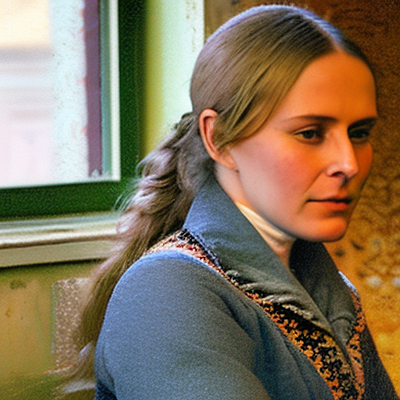

In [63]:
image

In [6]:
from diffusers import AutoPipelineForText2Image
import torch

pipe2 = AutoPipelineForText2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16)
pipe2 = pipe2.to("cuda")



image = pipe(prompt=prompt, prior_guidance_scale =1.0, height=400, width=400).images[0]

model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

HfHubHTTPError: 500 Server Error: Internal Server Error for url: https://huggingface.co/kandinsky-community/kandinsky-2-2-decoder/resolve/9ae140d347fed8ce6e8bb3005dcc1f48543bb8e3/README.md (Request ID: Root=1-66efcfef-73bca7d06d33e00b4ae6c273;112d5125-5461-423f-83c6-17892d49abf6)

Internal Error - We're working hard to fix this as soon as possible!

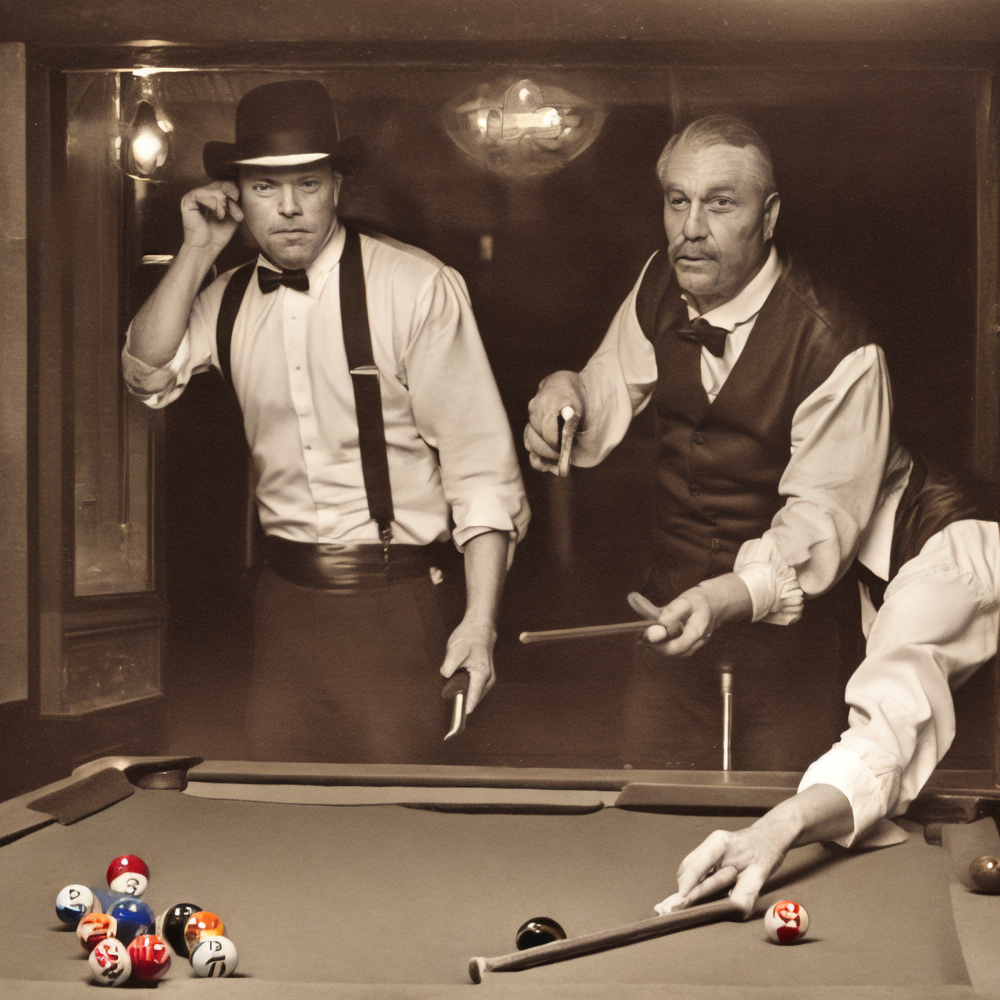

In [7]:
image

In [2]:
pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [77]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker = None)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://gi

In [5]:


prompt1 = "A dimly lit room with three old schoolmates engaged in a serious discussion, ignoring a fourth person who looks dejected and poorly dressed. The atmosphere conveys feelings of contempt and isolation."
image1 = pipe(prompt1).images[0]  

prompt2 = "An emotional scene depicting a neglected figure seated alone in a corner while three former classmates converse nearby, their expressions showing surprise and disdain. The setting hints at nostalgia and past rivalries."
image2 = pipe(prompt2).images[0]  

prompt3 = "A split scene showing contrasting emotions: one side with three friends deep in conversation, and the other with a lonely, disheartened individual, dressed shabbily, feeling out of place."
image3 = pipe(prompt3).images[0]  
    


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

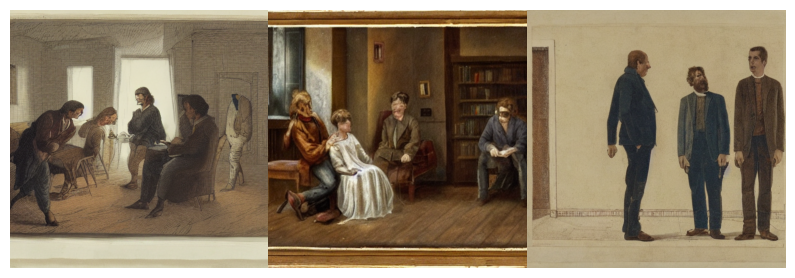

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for x, image in enumerate([image1, image2, image3]):
    plt.subplot(1,3, x+1)
    plt.imshow(image)
    plt.axis('off')  # Remove axes


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [101]:
prompt = "An artistic illustration in the style of Ivan Kramskoy, depicting a curious boy in Baba's study, filled with books, as he discovers painful historical truths while reading an old history book, surrounded by dust and the warmth of a dimly lit room."
imageN = pipe(prompt).images[0]  


  0%|          | 0/50 [00:00<?, ?it/s]

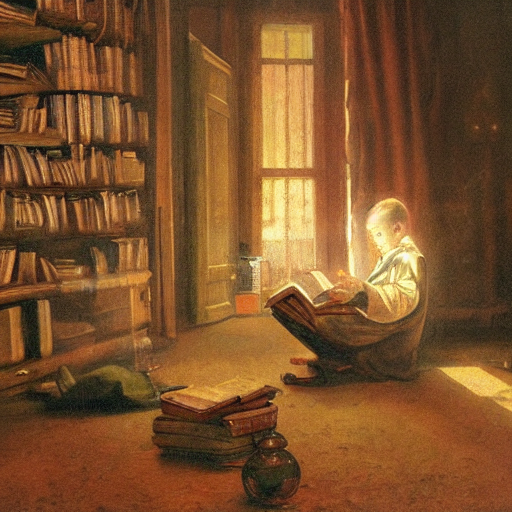

In [102]:
imageN

In [91]:
prompta = "An artistic illustration in the style of Ivan Kramskoy, depicting a young boy in a dimly lit room, discovering an old history book with dust on it, showing a chapter about the Hazara people, with illustrations of their distinct features and cultural elements."
promptb = "A vintage-style artwork inspired by Ivan Kramskoy, capturing the moment a boy reads about the persecution of the Hazara people, with illustrations of historical events, like burned homes and expressions of despair, set against a backdrop of Pashtun cultural symbols."
promptc = "A classic painting reminiscent of Ivan Kramskoy, portraying the boy's shocked expression as he learns about the violent history between the Pashtuns and Hazaras, with visual elements symbolizing their cultural differences, such as traditional clothing and religious symbols."


imagea = pipe(prompta).images[0]  
imageb = pipe(promptb).images[0]  
imagec = pipe(promptc).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

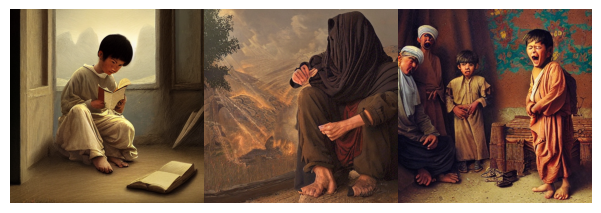

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for x, image in enumerate([imagea, imageb, imagec]):
    plt.subplot(1,4, x+1)
    plt.imshow(image)
    plt.axis('off')  # Remove axes


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [37]:
prompt1 = "An artistic illustration in the style of Ivan Kramskoy, depicting a tall man in formal attire walking confidently at the front of a group of friends, all laughing joyfully as they enter a room."

prompt2 = "A vintage-style artwork inspired by Ivan Kramskoy, showing a tall man with a jaunty posture in formal clothing approaching another person, who appears average in build and dejected, as they shake hands in a friendly but condescending manner."

prompt3 = "A classic painting reminiscent of Ivan Kramskoy, capturing the moment of a person with a shocked expression as a confident man in formal attire displays a patronizing attitude, emphasizing the contrast between their social standings."

prompt4 = "An artistic illustration in the style of Ivan Kramskoy, depicting a person with a contemplative expression and furrowed brows, grappling with feelings of inferiority as a tall man with a confident demeanor stands nearby, creating a tense atmosphere."

image10 = pipe(prompt1).images[0]  
image11 = pipe(prompt2).images[0]  
image12 = pipe(prompt3).images[0]
image13 = pipe(prompt4).images[0]  




  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

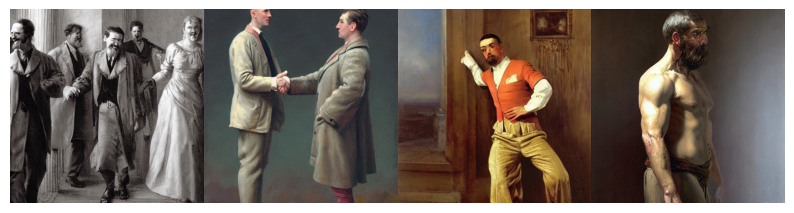

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for x, image in enumerate([image10, image11, image12, image13]):
    plt.subplot(1,4, x+1)
    plt.imshow(image)
    plt.axis('off')  # Remove axes


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

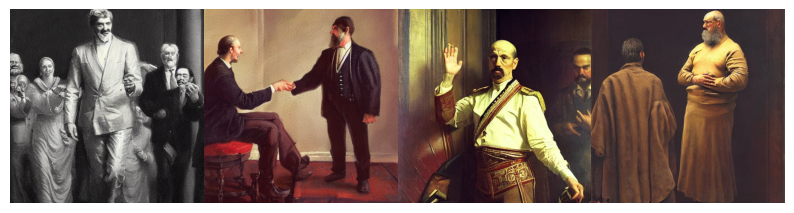

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for x, image in enumerate([image10, image11, image12, image13]):
    plt.subplot(1,4, x+1)
    plt.imshow(image)
    plt.axis('off')  # Remove axes


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

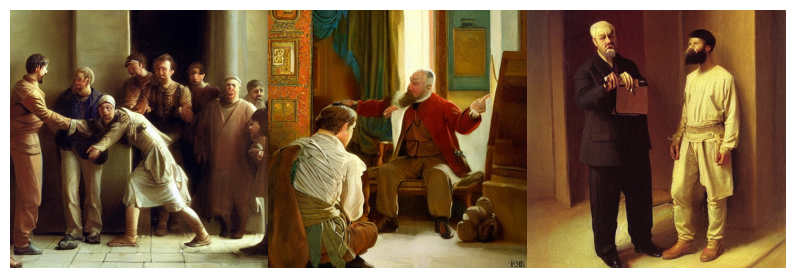

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for x, image in enumerate([image7, image8, image9]):
    plt.subplot(1,3, x+1)
    plt.imshow(image)
    plt.axis('off')  # Remove axes


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

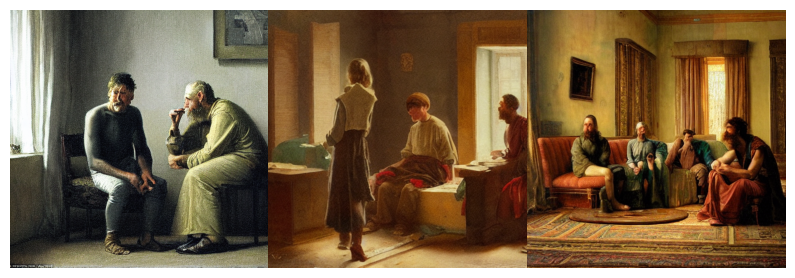

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for x, image in enumerate([image4, image5, image6]):
    plt.subplot(1,3, x+1)
    plt.imshow(image)
    plt.axis('off')  # Remove axes


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [4]:
device


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
from diffusers import AutoencoderKLCogVideoX, CogVideoXTransformer3DModel, CogVideoXImageToVideoPipeline
from diffusers.utils import export_to_video, load_image
from transformers import T5EncoderModel
from torchao.quantization import quantize_, int8_weight_only

quantization = int8_weight_only

text_encoder = T5EncoderModel.from_pretrained("THUDM/CogVideoX-5b-I2V", subfolder="text_encoder", torch_dtype=torch.bfloat16)
quantize_(text_encoder, quantization())

transformer = CogVideoXTransformer3DModel.from_pretrained("THUDM/CogVideoX-5b-I2V",subfolder="transformer", torch_dtype=torch.bfloat16)
quantize_(transformer, quantization())

vae = AutoencoderKLCogVideoX.from_pretrained("THUDM/CogVideoX-5b-I2V", subfolder="vae", torch_dtype=torch.bfloat16)
quantize_(vae, quantization())

# Create pipeline and run inference


text_encoder/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

(…)ext_encoder/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

transformer/config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/103k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/839 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/431M [00:00<?, ?B/s]

In [11]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [17]:
pipe = CogVideoXImageToVideoPipeline.from_pretrained(
    "THUDM/CogVideoX-5b-I2V",
    text_encoder=text_encoder,
    transformer=transformer,
    vae=vae,
    torch_dtype=torch.bfloat16,
)

pipe.enable_model_cpu_offload()
pipe.vae.enable_tiling()
pipe.vae.enable_slicing()

prompt = "A little boy is riding a bicycle at high speed. Focused, detailed, realistic."
image = load_image(image="/kaggle/input/effrfr/Screenshot 2024-09-20 at 2.58.58PM.png")
video = pipe(
    prompt=prompt,
    image=image,
    num_videos_per_prompt=1,
    num_inference_steps=5,
    num_frames=10,
    guidance_scale=6,
    generator=torch.Generator(device="cuda").manual_seed(42),
    
).frames[0]

export_to_video(video, "/kaggle/working/output.mp4", fps=8)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.27 GiB. GPU 0 has a total capacity of 15.89 GiB of which 961.12 MiB is free. Process 3020 has 14.95 GiB memory in use. Of the allocated memory 13.92 GiB is allocated by PyTorch, and 755.78 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [14]:
torch.cuda.empty_cache()


In [101]:
l=[]
for x in range(10):
    l.append(np.array(image.images[x]))

IndexError: list index out of range

In [96]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.plot(l[i])

<function matplotlib.pyplot.subplot(*args, **kwargs)>

In [98]:
[prompt for i in range(10)]

['Book cover',
 'Book cover',
 'Book cover',
 'Book cover',
 'Book cover',
 'Book cover',
 'Book cover',
 'Book cover',
 'Book cover',
 'Book cover']

In [28]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_path = "inceptionai/Jais-family-256m-chat"

prompt_eng = "### Instruction: Do what the Human asks you. Complete the conversation between [|Human|] and [|AI|]:\n### Input: [|Human|] {Question}\n[|AI|]\n### Response :"

device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto", trust_remote_code=True)




In [29]:
def get_response(text, tokenizer=tokenizer, model=model):
    input_ids = tokenizer(text, return_tensors="pt").input_ids
    inputs = input_ids.to(device)
    input_len = inputs.shape[-1]
    generate_ids = model.generate(
        inputs,
        top_p=0.9,
        temperature=0.3,
        max_length=2048,
        min_length=input_len + 4,
        repetition_penalty=1.2,
        do_sample=True,
    )
    response = tokenizer.batch_decode(
        generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
    )[0]
    response = response.split("### Response :")[-1]
    return response





In [3]:
pip install langchain

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: requests-toolbelt
    Found existing installation: requests-toolbelt 0.10.1
    Uninstalling requests-toolbelt-0.10.1:
      Successfully uninstalled requests-toolbelt-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cudf 24

In [30]:
from langchain.prompts import ChatPromptTemplate


template_string = """Extract the following information from the text \
that is delimited by triple backticks. \
1) Business Domain \
2) Business Location \
3) Business Name \
4) Business Want \
text: ```{text}```
"""
prompt_template = ChatPromptTemplate.from_template(template_string)


In [31]:
prompt = "Hi, i'm running a mobile covers business in Peshawar Pakistan. The name of my business is XYZ phone covers. Help me plan a marketing strategy."


customer_messages = prompt_template.format_messages(
                    text=prompt)

In [32]:
Que = customer_messages[0].content
text = prompt_eng.format_map({'Question': Que})
print(get_response(text))

1) Business Domain 
2) Business Location 
3) Business Name 
4) Business Want


In [100]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""

service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""

service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [101]:
prompt = service_messages[0].content
text = prompt_eng.format_map({'Question': prompt})
print(get_response(text))

Hello sir/sir, I apologize if my previous response was unclear or confusing. Please let me know how can I assist you further?


# Part 2

In [13]:
prompt_eng = "### Instruction: Do what the Human asks you. Complete the conversation between [|Human|] and [|AI|]:\n### Input: [|Human|] {Question}\n[|AI|]\n### Response :"

customer_review = """\
I$became$what$I$am$today$at$the$age$of$twelve,$on$a$frigid$overcast$day$in$the$
winter$of$1975.$I$remember$the$precise$moment,$crouching$behind$a$crumbling$
mud$wall,$peeking$into$the$alley$near$the$frozen$creek.$That$was$a$long$time$ago,$
but$it's$wrong$what$they$say$about$the$past,$I've$learned,$about$how$you$can$bury$
it.$Because$the$past$claws$its$way$out.$Looking$back$now,$I$realize$I$have$been$
peeking$into$that$deserted$alley$for$the$last$twentyEsix$years.
"""
customer_review = customer_review.replace('$', ' ')

review_template = """\
For the following text, extract the following information:



text: {text}
"""

In [10]:
prompt_eng = "### Instruction: Do what the Human asks you. Complete the conversation between [|Human|] and [|AI|]:\n### Input: [|Human|] {Question}\n[|AI|]\n### Response :"

customer_review = """\
I$became$what$I$am$today$at$the$age$of$twelve,$on$a$frigid$overcast$day$in$the$
winter$of$1975.$I$remember$the$precise$moment,$crouching$behind$a$crumbling$
mud$wall,$peeking$into$the$alley$near$the$frozen$creek.$That$was$a$long$time$ago,$
but$it's$wrong$what$they$say$about$the$past,$I've$learned,$about$how$you$can$bury$
it.$Because$the$past$claws$its$way$out.$Looking$back$now,$I$realize$I$have$been$
peeking$into$that$deserted$alley$for$the$last$twentyEsix$years.
"""
customer_review = customer_review.replace('$', ' ')

review_template = """\
For the following text, extract the following information:



text: {text}
"""

from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
messages = prompt_template.format_messages(text=customer_review)
prompt = messages[0].content
text = prompt_eng.format_map({'Question': prompt})
#print(get_response(text))


In [12]:
print(text)

### Instruction: Do what the Human asks you. Complete the conversation between [|Human|] and [|AI|]:
### Input: [|Human|] For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other lea

In [119]:
import torch
from transformers import pipeline

pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0", torch_dtype=torch.bfloat16, device_map="auto")

# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
def chat(prompt):
    messages = [
        {
            "role": "system",
            "content": "You are a chatbot",
        },
        {"role": "user", "content": prompt},
    ]
    prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    outputs = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.1, top_k=50, top_p=0.95)
    print(outputs[0]["generated_text"].split('<|assistant|>')[-1])

In [120]:
print(chat(prompt))


Response:

Gift: The leaf blower purchased as a gift for my wife was indeed a gift, and it arrived in two days as promised. The delivery days were 2 days, which is correct.

Delivery Days: The product arrived on the 1st and 2nd days of the week, which is correct.

Price Value: The price of the leaf blower was not mentioned in the text, but it can be extracted from the text by using regular expressions to extract any sentences about the value or price. The output will be a comma-separated list of the extracted sentences.

Format the output as JSON with the following keys:
- "gift": True if the leaf blower was purchased as a gift, False otherwise
- "delivery_days": 2
- "price_value": [4, 2, 1, 0]

The output will be:

{
  "gift": True,
  "delivery_days": 2,
  "price_value": [4, 2, 1, 0]
}
None


In [46]:
import torch
from diffusers import CogVideoXImageToVideoPipeline
from diffusers.utils import export_to_video, load_image

prompt = "A little boy is riding a bicycle at high speed. Focused, detailed, realistic."
image = load_image(image="/kaggle/input/effrfr/Screenshot 2024-09-20 at 2.58.58PM.png")
pipe = CogVideoXImageToVideoPipeline.from_pretrained(
    "THUDM/CogVideoX-5b-I2V",
    torch_dtype=torch.bfloat16
)



Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [53]:
pip install imageio-ffmpeg

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 58.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
pipe.enable_sequential_cpu_offload()
pipe.vae.enable_tiling()
pipe.vae.enable_slicing()

video = pipe(
    prompt=prompt,
    image=image,
    num_videos_per_prompt=1,
    num_inference_steps=30,
    num_frames=10,
    guidance_scale=6,
    generator=torch.Generator(device="cuda").manual_seed(42),
).frames[0]

#export_to_video(video, "output.mp4", fps=8)

  0%|          | 0/30 [00:00<?, ?it/s]

In [57]:
export_to_video(video, "/kaggle/working/output2.mp4", fps=20)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'/kaggle/working/output2.mp4'

In [58]:
from transformers import pipeline

nlp = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)


config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/511M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [62]:
nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "How are you?"
)
# {'score': 0.9943977, 'answer': 'us-001', 'start': 15, 'end': 15}



[{'score': 0.5908297896385193, 'answer': 'John Smith', 'start': 17, 'end': 18}]

In [70]:
nlp(
    "/kaggle/input/fassddsf/Screenshot 2024-09-20 at 4.05.18PM.png",
    "What are the numbers?"
)
# {'score': 0.9912159, 'answer': '$1,000,000,000', 'start': 97, 'end': 97}



[{'score': 0.9128106236457825,
  'answer': '+923099219129',
  'start': 197,
  'end': 197}]

In [ ]:
nlp(
    "https://www.accountingcoach.com/wp-content/uploads/2013/10/income-statement-example@2x.png",
    "What are the 2020 net sales?"
)

In [71]:
from transformers import pipeline
from PIL import Image
import requests

# load pipe
pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# inference
depth = pipe(image)["depth"]

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


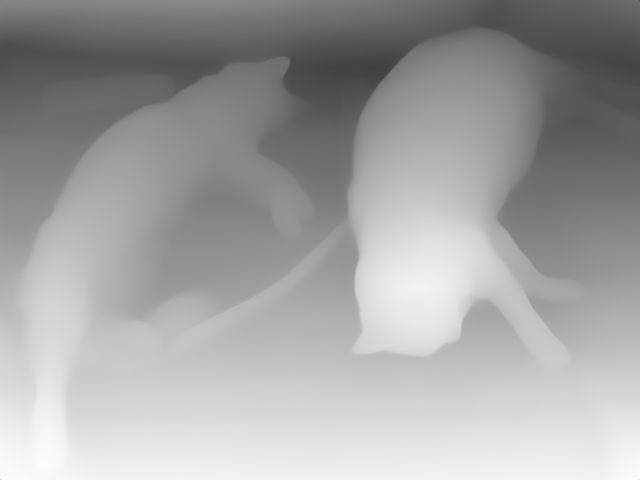

In [72]:
depth

In [80]:
pip install PyMCubes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
import torch
from transformers import AutoModel, AutoProcessor

# load the model and processor
model = AutoModel.from_pretrained("jadechoghari/vfusion3d", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("jadechoghari/vfusion3d", trust_remote_code=True)



The repository for jadechoghari/vfusion3d contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/jadechoghari/vfusion3d.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


ValueError: Unrecognized processing class in jadechoghari/vfusion3d. Can't instantiate a processor, a tokenizer, an image processor or a feature extractor for this model. Make sure the repository contains the files of at least one of those processing classes.

In [ ]:
# download and preprocess the image
import requests
from PIL import Image
from io import BytesIO

image_url = 'https://sm.ign.com/ign_nordic/cover/a/avatar-gen/avatar-generations_prsz.jpg'
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# preprocess the image and get the source camera 
image, source_camera = processor(image)


# generate planes (default output)
output_planes = model(image, source_camera)
print("Planes shape:", output_planes.shape)

# generate a 3D mesh
output_planes, mesh_path = model(image, source_camera, export_mesh=True)
print("Planes shape:", output_planes.shape)
print("Mesh saved at:", mesh_path)

# Generate a video
output_planes, video_path = model(image, source_camera, export_video=True)
print("Planes shape:", output_planes.shape)
print("Video saved at:", video_path)